<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Práctica 2: Greedy</h2>
</center>
</p>
</div>

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un minimum spanning tree de ese grafo es un subgrafo que tiene que ser un árbol y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso proporcional entre ellos, que es un número representativo de algún objeto, distancia, etc.; y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o un árbol expandido mínimo es un árbol recubridor que pesa menos o igual que otros árboles recubridores. Todo grafo tiene un bosque recubridor mínimo.
  </p>
  <p>
      En esta práctica se plantea la implementación del algoritmo de Prim para encontrar el arbol de expansión mínima en el metro de Londres.
  </p>
  </div>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: El grafo del metro de londres.</li>
</ul>
<br>
<h3>OUTPUT</h3>

<ul>
<li>
__tree__: Objeto de tipo `Graph` que contenga el MST del grafo inical.
</li>
<ul>

</p>
</div>


In [11]:
import heapq
from graph import Graph
import random as r
def prim(G, origin=None, infinity = 99999999999):
    """ Implementación del algoritmo de Prim para obtener el MST de un grafo cualquiera.
    Args:
        G (Graph): El grafo de tipo Graph sobre el que queremos buscar los componentes conexos
    Returns:
        tree: El grafo de tipo Graph que contiene el arbol de expansión mínima.
    """
    
    nodes = G.nodes()
    if origin == None: #Si no hi ha node de origen d'entrada, agafem un node del graf G de forma aleatoria
        origin = nodes[r.randint(0,len(nodes)-1)]
        
    if origin not in G.nodes():#En cas de que s'entri un node que no existeix al graf G surt un error
        raise ValueError("Aquest node no es troba en el graf G")

    tree = Graph() #Començem amb un graph buit
    dic = {} #Per no modificar G, fico els atributs, prev i visited en un diccionari apart
    for node in nodes:
        dic.update({node : { 'prev' : None, 'visited' : False}})
        
        
    visited = []
    pending = []
    heapq.heapify(pending) #convertim la llista pending en un minheap
    
    current_node = origin
    heapq.heappush(pending, (0, origin, dic[origin]['prev']))
    
    
    while pending:
        
        minim = heapq.heappop(pending)#fem pop del node amb menor cost
        current_node = minim[1]
        prev = minim[2]
        
        if current_node not in tree.nodes():    
            tree.add_node(current_node, G.node[current_node])
            dic[current_node]['prev'] = prev
          
        for vei in G.neighbors(current_node):#mirem tots els veins del node actual
            
            if vei not in tree.nodes():
                heapq.heappush(pending, (G.edge[current_node][vei]['distance'], vei, current_node)) #afegim el node dins de l'array pending
            
        if dic[current_node]['visited'] == False:    
            visited.append(current_node) #Si el node actual no es troba a visited, el fiquem
            dic[current_node]['visited'] = True
    
    cami_minim = []#Dins d'aquesta array aniré posant les aristes que formen l'arbre generador minim
    
    #treballo amb els elements dins de la llista visited, perque en alguns casos particulars, utilitzant
    #l'atribut prev(el pare del node) no donava la solucio correcta.
    current_node = visited.pop(len(visited)-1)
    suma = 0
    
    while visited: #mentre visited no estigui buida
        if dic[current_node]['prev'] != None: #el node amb pare None sera el node origen.
            #creo una tupla (pare_node, node_actual)
            edge = (dic[current_node]['prev'],current_node)
            tree.add_edge(edge[1],edge[0],G.edge[edge[1]][edge[0]].copy())
            suma += tree.edge[edge[1]][edge[0]]['distance']
            cami_minim.append(edge)
            current_node = visited.pop(len(visited)-1)#El següent node a mirar.
        
    cami_minim.reverse()
    print(suma)
    print(len(tree.nodes()))
    print(len(tree.edges()))
    return tree

In [12]:
from util import *
from graph import Graph

G, lines = get_subway_graph('csv', Graph)
MST = prim(G, G.nodes()[0])


4.304248439691507
306
305


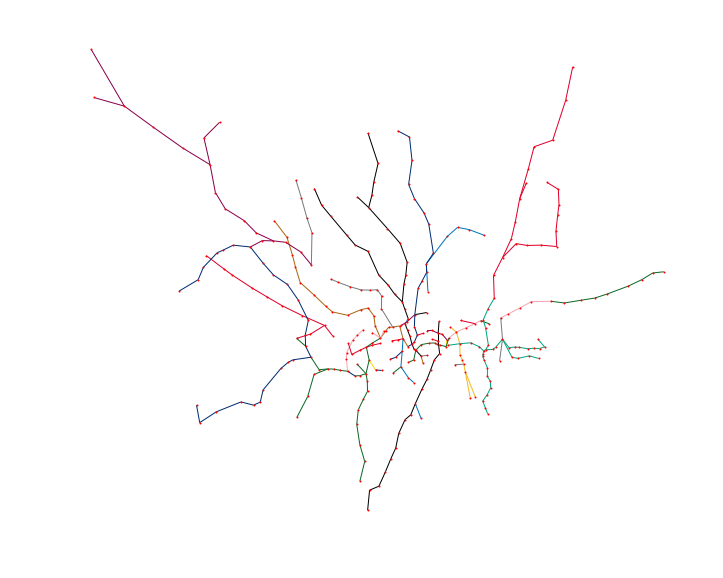

In [9]:
#graf MST
draw_subway_graph(MST, lines, figsize=(12,10))

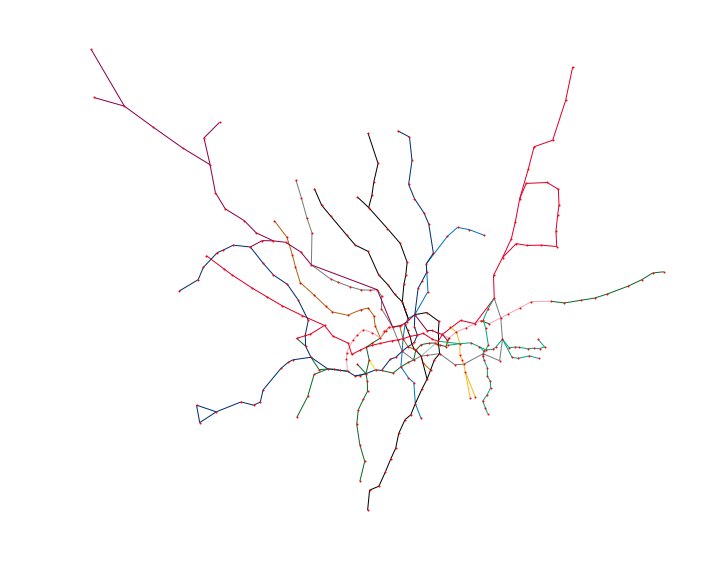

In [10]:
#graf originial
draw_subway_graph(G, lines, figsize=(12,10))

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>


In [ ]:
G = Graph()
G.add_node('A',attr_dict = {'prev':None})
G.add_node('B',attr_dict = {'prev':None})
G.add_node('C',attr_dict = {'prev':None})
G.add_node('D',attr_dict = {'prev':None})
G.add_node('E',attr_dict = {'prev':None})
G.add_node('F',attr_dict = {'prev':None})
G.add_node('Z',attr_dict = {'prev':None})

G.add_edge('A','B',attr_dict = {'distance':5})
G.add_edge('A','C',attr_dict = {'distance':6})
G.add_edge('A','D',attr_dict = {'distance':4})
G.add_edge('B','C',attr_dict = {'distance':1})
G.add_edge('B','D',attr_dict = {'distance':2})
G.add_edge('C','D',attr_dict = {'distance':2})
G.add_edge('C','E',attr_dict = {'distance':5})
G.add_edge('C','F',attr_dict = {'distance':3})
G.add_edge('D','F',attr_dict = {'distance':4})
G.add_edge('E','F',attr_dict = {'distance':4})
G.add_edge('A','Z',attr_dict = {'distance':8})




In [ ]:
prim(G, 'A')
prim(G)

<div class="alert alert-info">
<center>
  <h1>Comentarios</h1>
  <p>
  En esta sección tenéis que comentar brevemente (1) __cómo habéis realizado la implementación del algoritmo__ así como un (2) __análisis detallado de la complejidad__ del mismo.
  </p>
</center>
</div>

Per implementar l'algorisme començo creant un graf buit que anomenarem tree. Aleshores, cada vegada que mirem un node del graf G (es a dir, el current_node) l'afegirem al graf tree. 

El bucle while se ejecutara |V| veces, es decir, el numero de nodos que hay en el grafo de entrada. Y el bucle for se ejecutará 2*|E|, porque por cada nodo, tiene que visitar todos los nodos adyacentes (o vecinos). Añadir un elemento al minheap, como hay que mantener el arbol balanceado y el valor más pequeño como raíz, en el peor caso tardará O(log|V|) y se ejecutará O(2|E|log|V|) = O(|E|log|V|) veces. Para añadir el atributo value y prev a los nodos de los grafos tendremos que recorrer todo el grafo lo que supone O(|V|). Entonces, la complejidad total del algoritmo será:

O(|E|log|V| + log|V|+|V|) = *O(|E|log|V|)*

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
  <p>
  La entrega de esta práctica se realizará a través del __Campus Virtual__. En ella tenéis que incluir únicamente el fichero `.ipynb` sin comprimir con el código debidamente comentado y los comentarios que se os proponen en la anterior sección.
  </p>
  <p>
  El nombre del archivo ha de seguir el formato:
  </p><p style="text-align:center">
  ```
  <apellidos>_<nombre>_EP1.ipynb
  ```
  </p>
</center>
</div>